# Importing Pyhton Libraries


In [1]:
# All necessary librarires are imported.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV,RidgeCV

from scipy import stats
import statsmodels.api as sm

%matplotlib inline

# Loading Datasets

In [2]:
#train and test datasets are loaded.
df_test=pd.read_csv("./datasets/test.csv")
df_train=pd.read_csv("./datasets/train.csv")
df_sample_sub_reg=pd.read_csv("./datasets/sample_sub_reg.csv")

# Data Cleaning 

In [3]:
#initial checks
df_sample_sub_reg.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df_test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Cleaning numerical columns of the training dataset

In [8]:
# A list of numeric column from training dataset is created. 
types_numeric=[column for column in list(df_train.columns) if df_train[column].dtypes!='object']


In [9]:
# Here columns from training dataset are deleted when more than 1000 rows of them are missed. 

pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(25)
df_train.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'], axis=1, inplace=True)


In [10]:
# Here null numeric columns of the training dataset are determined.  
num_null_train=[{column:df_train[column].isnull().sum()} for column in types_numeric if df_train[column].isnull().sum()!=0]
num_null_train_plus=[column for column in types_numeric if df_train[column].isnull().sum()!=0] 
num_null_train

[{'Lot Frontage': 330},
 {'Mas Vnr Area': 22},
 {'BsmtFin SF 1': 1},
 {'BsmtFin SF 2': 1},
 {'Bsmt Unf SF': 1},
 {'Total Bsmt SF': 1},
 {'Bsmt Full Bath': 2},
 {'Bsmt Half Bath': 2},
 {'Garage Yr Blt': 114},
 {'Garage Cars': 1},
 {'Garage Area': 1}]

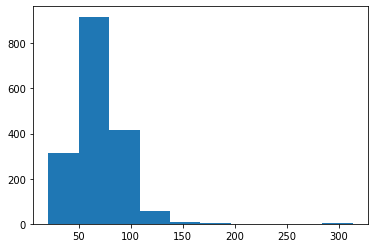

In [11]:
# To understand how to deal with null cells of these columns, histograms and description of these columns are studied. 
plt.hist(df_train['Lot Frontage']);

In [12]:
df_train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

Since the mean and median values for this column are very close to each other and most data points are close to mean/median, the null cells are filled by mean value of this column. 

In [13]:
df_train['Lot Frontage'].fillna(df_train['Lot Frontage'].mean(),inplace=True)

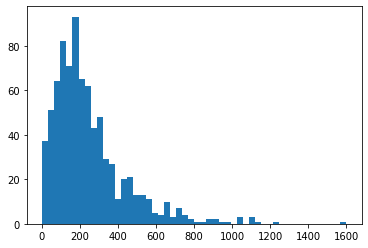

In [14]:
plt.hist(df_train['Mas Vnr Area'],bins=50, range=[1,1600]);

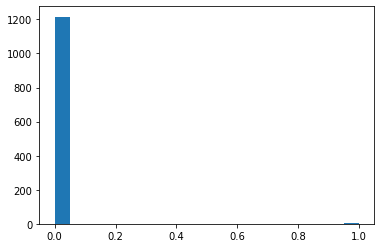

In [15]:
plt.hist(df_train['Mas Vnr Area'],bins=20, range=[0,1]);

In [16]:
df_train['Mas Vnr Area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

Since about 1200 cells are filled with zero and median is zero for this column, the null cells are filled with median.

In [17]:
df_train['Mas Vnr Area'].fillna(df_train['Mas Vnr Area'].median(),inplace=True)

In [18]:
df_train['Garage Yr Blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

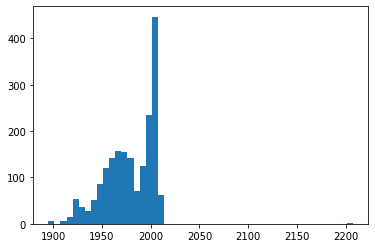

In [19]:
plt.hist(df_train['Garage Yr Blt'],bins=50);

In [20]:
df_train['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

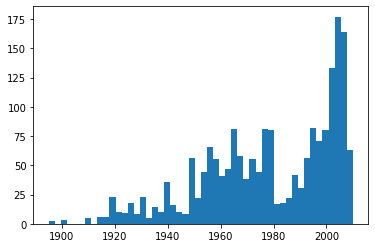

In [21]:
plt.hist(df_train['Garage Yr Blt'],bins=50, range=[1895,2010]);

Here the null cells are filled with median. 

In [22]:
df_train['Garage Yr Blt'].fillna(df_train['Garage Yr Blt'].median(),inplace=True)


## Cleaning object data type 

In [23]:
# A list of object column from the training dataset is created. 
types_object=[column for column in list(df_train.columns) if df_train[column].dtypes=='object']

In [24]:
# Here null object columns of the training dataset are determined.  
obj_null_train=[{column:df_train[column].isnull().sum()} for column in types_object if df_train[column].isnull().sum()!=0] 
obj_null_train_plus=[column for column in types_object if df_train[column].isnull().sum()!=0] 
obj_null_train

[{'Mas Vnr Type': 22},
 {'Bsmt Qual': 55},
 {'Bsmt Cond': 55},
 {'Bsmt Exposure': 58},
 {'BsmtFin Type 1': 55},
 {'BsmtFin Type 2': 56},
 {'Garage Type': 113},
 {'Garage Finish': 114},
 {'Garage Qual': 114},
 {'Garage Cond': 114}]

The null cells in all object-type columns are filled with the most common class in a desired column. 

In [25]:
[df_train[item].fillna(df_train[item].value_counts().index[0], inplace=True) for item in obj_null_train_plus];

In [26]:
# Finally, the rest of null cells is dropped. 
df_train.dropna(inplace=True)

In [27]:
# Last check of training dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2048 non-null   int64  
 1   PID              2048 non-null   int64  
 2   MS SubClass      2048 non-null   int64  
 3   MS Zoning        2048 non-null   object 
 4   Lot Frontage     2048 non-null   float64
 5   Lot Area         2048 non-null   int64  
 6   Street           2048 non-null   object 
 7   Lot Shape        2048 non-null   object 
 8   Land Contour     2048 non-null   object 
 9   Utilities        2048 non-null   object 
 10  Lot Config       2048 non-null   object 
 11  Land Slope       2048 non-null   object 
 12  Neighborhood     2048 non-null   object 
 13  Condition 1      2048 non-null   object 
 14  Condition 2      2048 non-null   object 
 15  Bldg Type        2048 non-null   object 
 16  House Style      2048 non-null   object 
 17  Overall Qual  

# Feature Engineering 

In [28]:
# Here highest correlation between [Saleprice] and other numerical parameters are determined. 
# Criteria is based on Pearson correlation more than 0.3 
df_train_corr=df_train.corr()

In [29]:
[{df_train_corr['SalePrice'].index[i]: df_train_corr['SalePrice'].values[i]}
 for i in range (0, len(df_train_corr['SalePrice'])) if np.absolute(df_train_corr['SalePrice'].values[i])>=0.3]

[{'Lot Frontage': 0.32596987179136205},
 {'Overall Qual': 0.8009752830035589},
 {'Year Built': 0.5722564109700342},
 {'Year Remod/Add': 0.5500553081272338},
 {'Mas Vnr Area': 0.504025290622299},
 {'BsmtFin SF 1': 0.4244633970616892},
 {'Total Bsmt SF': 0.6315072266500499},
 {'1st Flr SF': 0.6211813717335816},
 {'Gr Liv Area': 0.6980461693623491},
 {'Full Bath': 0.537368950577711},
 {'TotRms AbvGrd': 0.5029091798633167},
 {'Fireplaces': 0.47009124406852165},
 {'Garage Yr Blt': 0.5143601292059208},
 {'Garage Cars': 0.6481029335350884},
 {'Garage Area': 0.6500003061735466},
 {'Wood Deck SF': 0.3270068944871525},
 {'Open Porch SF': 0.33209046069565834},
 {'SalePrice': 1.0}]

In [30]:
# Now, we need to dummify categorical parameters to evaluate the correlation between these parameters and [SalePrice]. 

In [31]:
# Prior to dummify the categorical parameters, more important columns are selected.
#The criteria for selecting object-type columns is how distributed these columns are.  
[df_train.groupby(column)[['SalePrice']].count() for column in types_object]

[           SalePrice
 MS Zoning           
 A (agr)            2
 C (all)           19
 FV               101
 I (all)            1
 RH                14
 RL              1597
 RM               314,
         SalePrice
 Street           
 Grvl            7
 Pave         2041,
            SalePrice
 Lot Shape           
 IR1              690
 IR2               55
 IR3                9
 Reg             1294,
               SalePrice
 Land Contour           
 Bnk                  80
 HLS                  85
 Low                  43
 Lvl                1840,
            SalePrice
 Utilities           
 AllPub          2046
 NoSeWa             1
 NoSewr             1,
             SalePrice
 Lot Config           
 Corner            348
 CulDSac           131
 FR2                60
 FR3                 8
 Inside           1501,
             SalePrice
 Land Slope           
 Gtl              1950
 Mod                88
 Sev                10,
               SalePrice
 Neighborhood           
 

In [32]:
# Dummification of selected categorical columns.
df_train_with_dummies=pd.get_dummies(data=df_train,columns=['MS Zoning','Lot Shape','Land Contour',
                          'Lot Config','Neighborhood','Condition 1','Bldg Type','House Style',
                          'Roof Style','Exterior 1st','Exterior 2nd',
                          'Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Exposure'
                          ,'BsmtFin Type 1', 'BsmtFin Type 2','Heating',
                          'Heating QC','Electrical','Kitchen Qual','Functional','Garage Type','Garage Finish',
                         'Garage Qual','Paved Drive','Sale Type'])

In [33]:
df_train_with_dummies.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Street,Utilities,Land Slope,Condition 2,Overall Qual,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,69.0552,13517,Pave,AllPub,Gtl,Norm,6,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0000,11492,Pave,AllPub,Gtl,Norm,7,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0000,7922,Pave,AllPub,Gtl,Norm,5,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0000,9802,Pave,AllPub,Gtl,Norm,5,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0000,14235,Pave,AllPub,Gtl,Norm,6,...,0,0,0,0,0,0,0,0,0,1


 #### We have all columns (object and numeric) with correlations more than |0.3| with SalePrice are selected and stored in 'feature' list.

In [34]:
corr_Saleprice=df_train_with_dummies.corr()['SalePrice']

In [35]:
features=[corr_Saleprice.index[i] for i in range (0, len(corr_Saleprice)) if np.absolute(corr_Saleprice.values[i])>=0.3]

In [36]:
features.remove('SalePrice')

## Model Preparation

In [37]:
X=df_train_with_dummies[features]
y=np.log(df_train_with_dummies['SalePrice'])

In [38]:
# Tried to apply polynomial features but did not work. Ask Sumit for help. 
#poly=PolynomialFeatures()
#X=poly.fit_transform(X)

In [39]:
# Train/test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.2)

In [40]:
X_train.shape

(1638, 42)

In [41]:
X_test.shape

(410, 42)

In [42]:
#Scaling
ss=StandardScaler()
X_train_sc=ss.fit_transform(X_train)
X_test_sc=ss.transform(X_test)

### Instantiating Models (Linear Regression, Lasso, and Ridge)

In [43]:
lr=LinearRegression()

r_alphas=np.logspace(start=1,stop=10,num=50)
ridge=RidgeCV(alphas=r_alphas,scoring="r2",cv=5)

l_alphas=np.logspace(-10,10,50)
lasso=LassoCV(alphas=l_alphas,cv=5)

### Cross Validation

In [44]:
#Calculating the best cv value for cross valudation in linear regression. 
{max([cross_val_score(lr,X_train_sc,y_train,cv=i).mean() for i in range(2,100)]):
 [cross_val_score(lr,X_train_sc,y_train,cv=i).mean() for i in range(2,100)].
 index(max([cross_val_score(lr,X_train_sc,y_train,cv=i).mean() for i in range(2,100)]))}


{0.8188535893654716: 6}

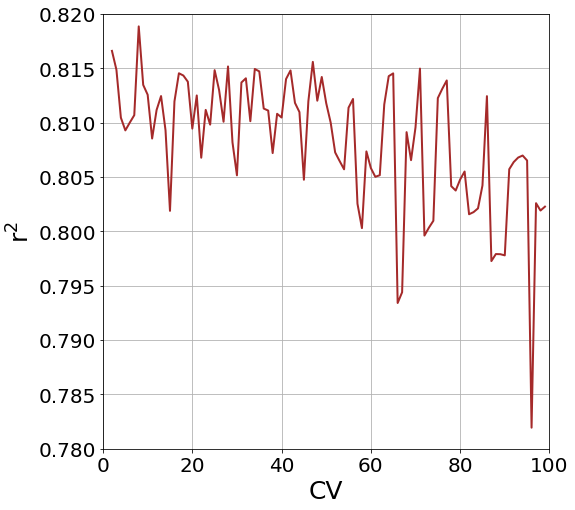

In [45]:
fig=plt.figure(figsize=(8,8))
plt.plot(range(2,100),[cross_val_score(lr,X_train_sc,y_train,cv=i).mean() for i in range(2,100)], color='brown',lw=2)
plt.xlabel("CV" , fontsize = 25)
plt.ylabel("r$^{2}$", fontsize = 25)
plt.xticks(fontsize=20)
plt.ylim(0.78,0.82)
plt.xlim(0,100)
plt.yticks(fontsize=20)
plt.grid(True)
plt.savefig("images/cv.jpg", dpi=600);

In [46]:
cross_val_score(lr,X_train_sc,y_train,cv=8).mean()

0.8188535893654716

In [47]:
cross_val_score(lasso,X_train_sc,y_train,cv=15).mean()

0.805144330868993

In [48]:
cross_val_score(ridge,X_train_sc,y_train,cv=15).mean()

0.8060909137794218

# Model Fitting and Evaluation

In [49]:
# Fitting three model to the training set of the training dataset and evaluating the scores.  
lr.fit(X_train_sc,y_train)

LinearRegression()

In [50]:
lasso.fit(X_train_sc,y_train);

In [51]:
ridge.fit(X_train_sc,y_train);

In [52]:
lr.score(X_train_sc,y_train)

0.8436412497013562

In [53]:
lr.score(X_test_sc,y_test)

0.8842173216068205

In [54]:
lasso.score(X_train_sc,y_train)

0.838755228625939

In [55]:
lasso.score(X_test_sc,y_test)

0.8816957329229016

In [56]:
ridge.score(X_train_sc,y_train)

0.8395719574054408

In [57]:
ridge.score(X_test_sc,y_test)

0.8857880229731598

## Calculating coefficients and intercepts for these three regression models

In [58]:
lr.coef_

array([ 0.00765875,  0.13446614,  0.0285472 ,  0.03758852, -0.0044592 ,
        0.02459186,  0.01405822,  0.00898863,  0.08096672,  0.00684087,
        0.01080392,  0.03448416, -0.01046795,  0.0451397 ,  0.00445778,
        0.00898815, -0.00385886, -0.01487169,  0.01220754,  0.03462799,
       -0.03749073,  0.00155143, -0.00835362,  0.02362882,  0.07192005,
        0.07823598,  0.04543791,  0.04368672,  0.00769127,  0.00934672,
        0.0113105 , -0.01079122,  0.00368699,  0.01282751, -0.01250692,
        0.05462139,  0.06704504,  0.05238497, -0.0024563 , -0.00558478,
       -0.01465988,  0.00505074])

In [59]:
lr.intercept_

12.020575491397244

In [60]:
lasso.coef_

array([ 0.00664947,  0.14047128,  0.0295028 ,  0.0376827 , -0.        ,
        0.02613075,  0.01414437,  0.00953136,  0.08035764,  0.00344323,
        0.00855561,  0.03365182, -0.        ,  0.04652726,  0.00383933,
        0.00765596, -0.        , -0.01306871,  0.00909347, -0.        ,
       -0.        ,  0.        , -0.00379047, -0.        ,  0.00706892,
        0.01403284,  0.03376581,  0.02607888,  0.00432268,  0.00217448,
        0.0083492 , -0.00855797,  0.        ,  0.01412153, -0.00749086,
        0.02204275,  0.01465505,  0.        , -0.00128053, -0.00022447,
       -0.01287277,  0.00058821])

In [61]:
lasso.intercept_

12.020575491397244

In [62]:
ridge.coef_

array([ 5.92884209e-03,  1.17516225e-01,  3.15303741e-02,  3.82876233e-02,
       -9.76537026e-04,  2.33688450e-02,  1.88710547e-02,  1.02558620e-02,
        6.48583543e-02,  1.09466390e-02,  1.93788630e-02,  3.71931459e-02,
       -7.46972110e-03,  3.75072816e-02,  1.62197556e-02,  1.02343499e-02,
       -9.51518009e-04, -1.48232982e-02,  1.10346784e-02,  6.05545692e-03,
       -8.88473136e-03,  8.56460205e-05, -7.44636849e-03,  4.19957553e-03,
        2.23999089e-02,  2.45043971e-02,  3.15718177e-02,  2.83819480e-02,
        9.32955087e-03,  4.61850215e-03,  1.15602220e-02, -9.91227196e-03,
        2.82386299e-03,  1.55052468e-02, -9.82377399e-03,  3.18004178e-02,
        2.90171111e-02,  1.30996256e-02, -3.97531329e-03, -2.85214959e-03,
       -1.57103934e-02,  3.87934173e-03])

In [63]:
ridge.intercept_

12.020575491397244

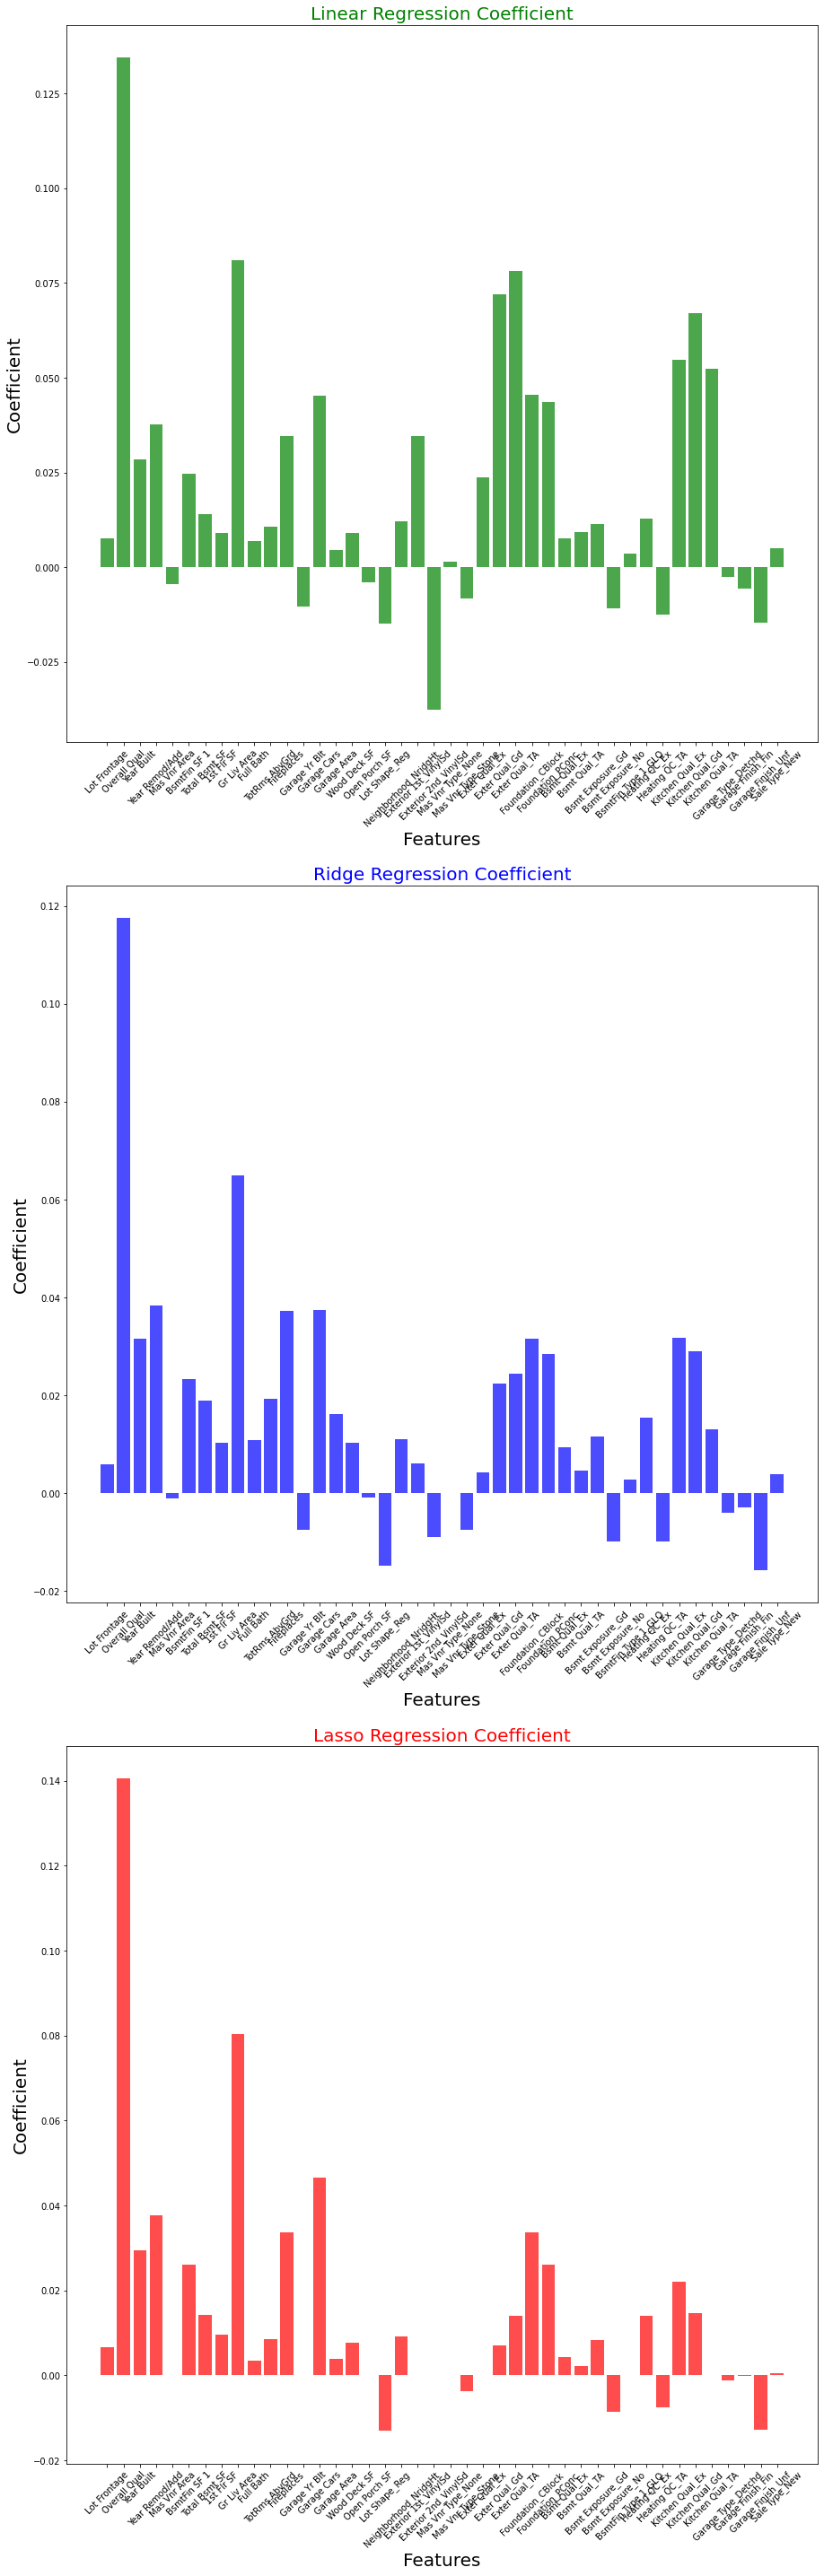

In [64]:
# coefficients for all features are plotted for three models.  
fig=plt.figure(figsize=(15,50))
ax1=plt.subplot(311)
ax1.set_title("Linear Regression Coefficient", color='green',fontsize=20)
ax1.bar(features,pd.Series(lr.coef_), color='green', alpha=0.7)
ax1.set_ylabel("Coefficient",fontsize=20)
ax1.set_xlabel("Features",fontsize=20)
plt.xticks(rotation=45, fontsize=10);

ax1=plt.subplot(312)
ax1.set_title("Ridge Regression Coefficient", color='blue',fontsize=20)
ax1.bar(features,pd.Series(ridge.coef_), color='blue',alpha=0.7)
ax1.set_ylabel("Coefficient",fontsize=20)
ax1.set_xlabel("Features",fontsize=20)
plt.xticks(rotation=45, fontsize=10);

ax1=plt.subplot(313)
ax1.set_title("Lasso Regression Coefficient", color='red',fontsize=20)
ax1.bar(features,pd.Series(lasso.coef_), color='red',alpha=0.7)
ax1.set_ylabel("Coefficient",fontsize=20)
ax1.set_xlabel("Features",fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.savefig("images/Bar.jpg", dpi=600);



# Predicting test set of the training dataset

In [65]:
y_pred_lr=lr.predict(X_test_sc)

In [66]:
y_pred_lasso=lasso.predict(X_test_sc)

In [67]:
y_pred_ridge=ridge.predict(X_test_sc)

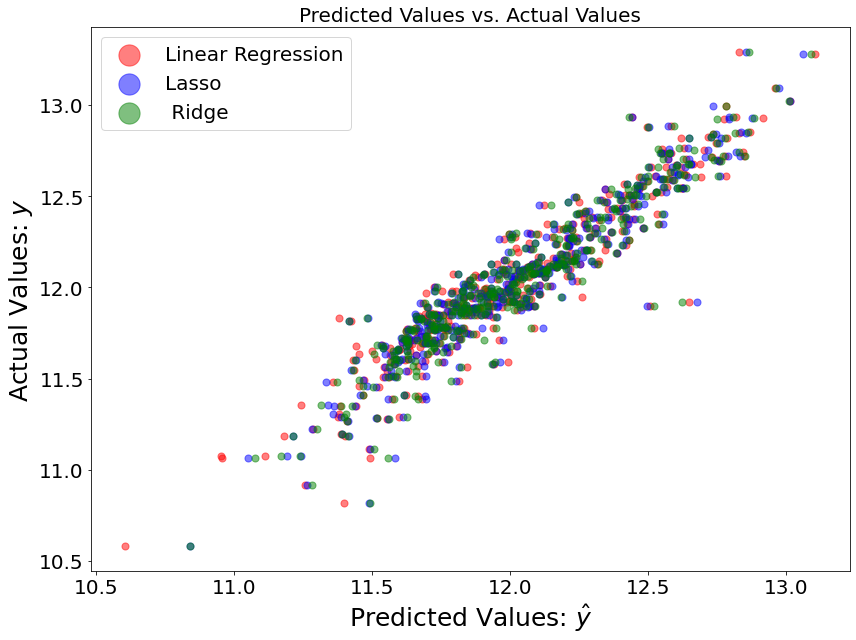

In [68]:
# scater plots for predicted versus actual y values are plotted for three models.
fig=plt.figure(figsize=(12,9))

lr_plt=plt.scatter(y_pred_lr, y_test, s=50, color='red', alpha = 0.5)
lasso_plt=plt.scatter(y_pred_lasso, y_test, s=50, color='blue', alpha = 0.5)
ridge_plt=plt.scatter(y_pred_ridge, y_test, s=50, color='green', alpha = 0.5)
plt.legend((lr_plt,lasso_plt,ridge_plt),('Linear Regression','Lasso',' Ridge'),ncol=1,fontsize=20,loc='best',markerscale=3)

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 25)
plt.ylabel("Actual Values: $y$", fontsize = 25)
plt.title('Predicted Values vs. Actual Values', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("images/Predicted_Actual.jpg", dpi=600);

In [69]:
# Here significant parameters are evaluated using statmodels
#X_train_sc_sm=sm.add_constant(X_train_sc)
#sm_model=sm.OLS(y_train,X_train_sc_sm).fit();
#sm_model.summary()

In [70]:
X_train_sc_sm=sm.add_constant(X_train)
sm_model=sm.OLS(y_train,X_train_sc_sm).fit();
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:58:47   Log-Likelihood:                 660.37
No. Observations:                1638   AIC:                            -1235.
Df Residuals:                    1595   BIC:                            -1002.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9564      0.799      7.458      0.000       4.390       7.523
Lot Frontage             0.0004      0.000      1.564      0.118   -9.11e-05       0.001
Overall Qual             0.0944      0.005     17.433      0.000       0.084       0.105
Year Built               0.0009      0.000      3.075      0.002       0.000       0.002
Year Remod/Add           0.0018      0.000      5.860      0.000       0.001       0.002
Mas Vnr Area         -2.612e-05   3.75e-05     -0.697      0.486   -9.96e-05    4.74e-05
BsmtFin SF 1          5.264e-05   1.32e-05      3.984      0.000    2.67e-05    7.86e-05
Total Bsmt SF         3.089e-05   1.95e-05      1.583      0.114   -7.37e-06    6.91e-05
1st Flr SF            2.266e-05   2.18e-05      1.040      0.299   -2.01e-05    6.54e-05
Gr Liv Area              0.0002   2.02e-05      8.186      0.000       0.000       0.000
Full Bath                0.0124      0.011      1.124      0.261      -0.009       0.034
TotRms AbvGrd            0.0070      0.005      1.412      0.158      -0.003       0.017
Fireplaces               0.0539      0.008      6.806      0.000       0.038       0.069
Garage Yr Blt           -0.0004      0.000     -1.433      0.152      -0.001       0.000
Garage Cars              0.0596      0.013      4.424      0.000       0.033       0.086
Garage Area           2.076e-05   4.77e-05      0.436      0.663   -7.27e-05       0.000
Wood Deck SF          7.352e-05   3.65e-05      2.012      0.044    1.85e-06       0.000
Open Porch SF        -5.791e-05   6.71e-05     -0.863      0.388      -0.000    7.37e-05
Lot Shape_Reg           -0.0308      0.009     -3.352      0.001      -0.049      -0.013
Neighborhood_NridgHt     0.0520      0.022      2.407      0.016       0.010       0.094
Exterior 1st_VinylSd     0.0724      0.045      1.593      0.111      -0.017       0.161
Exterior 2nd_VinylSd    -0.0784      0.045     -1.740      0.082      -0.167       0.010
Mas Vnr Type_None        0.0032      0.013      0.244      0.808      -0.022       0.029
Mas Vnr Type_Stone      -0.0303      0.017     -1.736      0.083      -0.064       0.004
Exter Qual_Ex            0.1202      0.051      2.364      0.018       0.020       0.220
Exter Qual_Gd            0.1517      0.042      3.650      0.000       0.070       0.233
Exter Qual_TA            0.1601      0.038      4.160      0.000       0.085       0.236
Foundation_CBlock        0.0920      0.016      5.682      0.000       0.060       0.124
Foundation_PConc         0.0878      0.019      4.518      0.000       0.050       0.126
Bsmt Qual_Ex             0.0268      0.021      1.305      0.192      -0.014       0.067
Bsmt Qual_TA             0.0188      0.013      1.477      0.140      -0.006       0.044
Bsmt Exposure_Gd         0.0380      0.017      2.250    

# Predicting Sale Price for a New Dataset called "Test" 

In [71]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### Here, the same cleaning procedure for test dataset is performed to ensure that the test dataframe is similar to the training dataset. 

In [72]:
# cleaning numerical columns.
# 'Pool QC':874,'Misc Feature':837,'Alley':820,'Fence':706,'Fireplace Qu':422, Columns with top missing cells. 
# Same as training dataset, these columns should be deleted.  
pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False)).head(25)
df_test.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'], axis=1, inplace=True)

In [73]:
# Numeric columns with null cells are determined in test dataset. 
types_numeric_test=[column for column in list(df_test.columns) if df_test[column].dtypes!='object']
num_null_test=[{column:df_test[column].isnull().sum()} for column in types_numeric_test if df_test[column].isnull().sum()!=0]
num_null_test_plus=[column for column in types_numeric_test if df_test[column].isnull().sum()!=0] 
num_null_test

[{'Lot Frontage': 160}, {'Mas Vnr Area': 1}, {'Garage Yr Blt': 45}]

In [74]:
df_test.shape

(878, 75)

In [75]:
df_test['Lot Frontage'].describe()

count    718.000000
mean      69.545961
std       23.533945
min       21.000000
25%       59.000000
50%       68.000000
75%       80.000000
max      182.000000
Name: Lot Frontage, dtype: float64

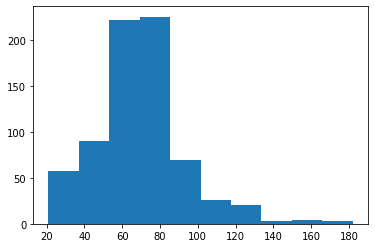

In [76]:
plt.hist(df_test['Lot Frontage']);

In [77]:
df_test['Lot Frontage'].fillna(df_test['Lot Frontage'].mean(),inplace=True)

In [78]:
df_test['Garage Yr Blt'].describe()

count     833.000000
mean     1976.759904
std        25.689763
min      1900.000000
25%      1960.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

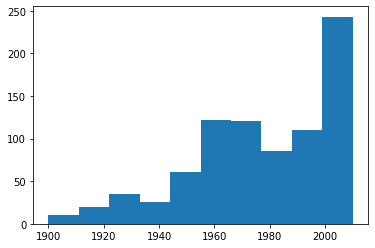

In [79]:
plt.hist(df_test['Garage Yr Blt']);

In [80]:
df_test['Garage Yr Blt'].fillna(df_test['Garage Yr Blt'].median(),inplace=True)

In [81]:
df_test['Mas Vnr Area'].describe()


count     877.000000
mean      106.236032
std       187.158908
min         0.000000
25%         0.000000
50%         0.000000
75%       172.000000
max      1378.000000
Name: Mas Vnr Area, dtype: float64

In [82]:
df_test['Mas Vnr Area'].fillna(df_test['Mas Vnr Area'].median(),inplace=True)

#### Now, the same procedure is repeated for object type columns

In [83]:
types_object_test=[column for column in list(df_test.columns) if df_test[column].dtypes=='object']
obj_null_test=[{column:df_test[column].isnull().sum()} for column in types_object_test if df_test[column].isnull().sum()!=0] 
obj_null_test_plus=[column for column in types_object_test if df_test[column].isnull().sum()!=0]

In [84]:
[df_test[item].fillna(df_test[item].value_counts().index[0], inplace=True) for item in obj_null_test_plus];

In [85]:
df_train.dropna(inplace=True)

In [86]:
df_test_with_dummies=pd.get_dummies(data=df_test,columns=['MS Zoning','Lot Shape','Land Contour',
                          'Lot Config','Neighborhood','Condition 1','Bldg Type','House Style',
                          'Roof Style','Exterior 1st','Exterior 2nd',
                          'Mas Vnr Type','Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Exposure'
                          ,'BsmtFin Type 1', 'BsmtFin Type 2','Heating',
                          'Heating QC','Electrical','Kitchen Qual','Functional','Garage Type','Garage Finish',
                         'Garage Qual','Paved Drive','Sale Type'])

In [87]:
X_test_dataset=df_test_with_dummies[features]


In [88]:
ss=StandardScaler()
X_test_dataset_sc=ss.fit_transform(X_test_dataset)

In [89]:
y_test_dataset_lr=lr.predict(X_test_dataset_sc)

In [90]:
y_test_dataset_lasso=lasso.predict(X_test_dataset_sc)

In [91]:
y_test_dataset_ridge=ridge.predict(X_test_dataset_sc)

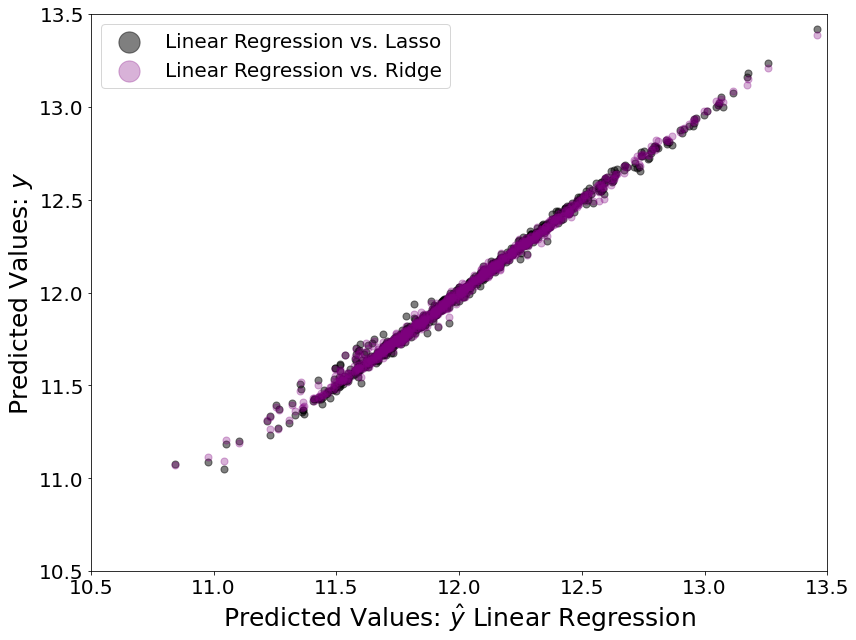

In [94]:
# Predicted y values from test dataset are plotted.
fig=plt.figure(figsize=(12,9))

lr_lasso_plt=plt.scatter(y_test_dataset_lr, y_test_dataset_lasso, s=50, color='black', alpha = 0.5)
lr_ridge_plt=plt.scatter(y_test_dataset_lr, y_test_dataset_ridge, s=50, color='purple', alpha = 0.3)

plt.legend((lr_lasso_plt,lr_ridge_plt),('Linear Regression vs. Lasso','Linear Regression vs. Ridge'),ncol=1,fontsize=20,loc='best',markerscale=3)

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$ Linear Regression" , fontsize = 25)
plt.ylabel("Predicted Values: $y$", fontsize = 25)
plt.xticks(fontsize=20)
plt.ylim(10.5,13.5)
plt.xlim(10.5,13.5)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("images/Predicted_Actual_test_dataset.jpg", dpi=600);

In [95]:
SalePrice=pd.DataFrame(np.exp(y_test_dataset_lr),columns=['SalePrice'])


In [96]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,7,2009,WD


In [97]:
sub=pd.concat([df_test, SalePrice], axis=1)

In [98]:
sub.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,2658,902301120,190,RM,69.000000,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,0,4,2006,WD,114902.040381
1,2718,905108090,90,RL,69.545961,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,0,8,2006,WD,164432.722805
2,2414,528218130,60,RL,58.000000,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,0,9,2006,New,219621.207637
3,1989,902207150,30,RM,60.000000,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,0,7,2007,WD,121174.091282
4,625,535105100,20,RL,69.545961,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,0,7,2009,WD,173036.695900


In [99]:
sub_reg=sub[['Id','SalePrice']]
#sub_reg=sub_reg.reset_index(drop=True)

In [100]:
sub_reg

,Id,SalePrice
0,2658,114902.040381
1,2718,164432.722805
2,2414,219621.207637
3,1989,121174.091282
4,625,173036.695900
...,...,...
873,1662,176512.667674
874,1234,200746.769762
875,1373,129574.102865
876,1672,107982.503153


In [101]:
sub_reg.to_csv("predicted_saleprice.csv", index=False)#./datasets/test.csv